# Blach-Scholes Model
André Guerra \
October, 2022 \
andre.guerra@mail.mcgill.ca

This notebook contains an example of the Black-Scholes model in pricing options.

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# CONSTANTS
# 1. Visualization constants
# a. sizing factors
TICKSFONT = 13
TITLEFONT = 15
TEXTFONT = 15
FIGWIDTH = 6.4
FIGHEIGHT = 4.8
LINEWIDTH = 3
ROLLWINDOW = 100
# b. zoom factors
ZOOMIN = 1.5
ZOOMOUT = 10

## Function definitions

In [5]:
def black_scholes_option(So, K, T, r, q, sigma, type):
    """Black-Scholes option price for CALL and PUT options

    Args:
        So (float):     Current stock price
        K (float):      Strike price
        T (float):      Time to expiration [years]
        r (float):      Risk free interest
        q (float):      Dividend yield
        sigma (float):  Volatility
        type (string):  Type of option ['CALL', 'PUT']

    Returns:
        option_price (float): Predicted option price at expiration
    """
    d1 = (np.log(So/K) + (r + (sigma**2)/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if type == 'CALL':
        option_price = So*norm.cdf(d1) - norm.cdf(d2)*K*np.exp(-r*T)
    elif type == 'PUT':
        option_price = norm.cdf(-d2)*K*np.exp(-r*T) - So*norm.cdf(-d1)
    return option_price

## Effect of the Greeks
### Initial stock price, $S_o$

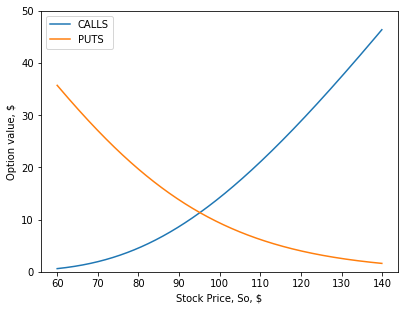

In [11]:
K = 100         # strike price, [$]
T = 1           # option contract expiration time [years]
r = 0.05        # annual risk free interest [0-1]
q = 0.02        # annual dividend rate [0-1]
sigma = 0.3     # annual volatility [0-1]
# range of initial stock prices
So = np.arange(60,140,0.1)

calls = [black_scholes_option(s,K,T,r,q,sigma,'CALL') for s in So]
puts = [black_scholes_option(s,K,T,r,q,sigma,'PUT') for s in So]

# plot the effect of initial value, So, on the option value at expiration
NROWS = 1
NCOLS = 1
f, axs = plt.subplots(nrows=NROWS,ncols=NCOLS,
                      figsize=(NCOLS*FIGWIDTH,NROWS*FIGHEIGHT))
axs.plot(So,calls,label='CALLS')
axs.plot(So,puts,label='PUTS')
axs.set_xlabel("Stock Price, So, $")
axs.set_ylabel("Option value, $")
axs.set_ylim(0,50)
axs.legend()

### Volatility, $\sigma$

/tmp/ipykernel_1766879/285832530.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(So/K) + (r + (sigma**2)/2)*T)/(sigma*np.sqrt(T))


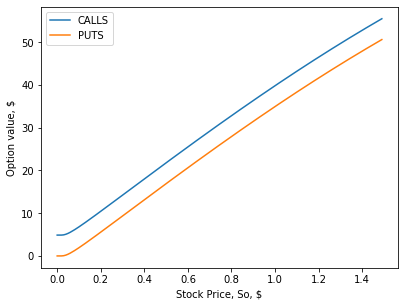

In [20]:
So = 100        # current stock price, [$]
K = 100         # strike price, [$]
T = 1           # option contract expiration time [years]
r = 0.05        # annual risk free interest [0-1]
q = 0.02        # annual dividend rate [0-1]
# range of volatility
sigmas = np.arange(0,1.5,0.01)

calls = [black_scholes_option(So,K,T,r,q,sigma,'CALL') for sigma in sigmas]
puts = [black_scholes_option(So,K,T,r,q,sigma,'PUT') for sigma in sigmas]

# plot the effect of initial value, So, on the option value at expiration
NROWS = 1
NCOLS = 1
f, axs = plt.subplots(nrows=NROWS,ncols=NCOLS,
                      figsize=(NCOLS*FIGWIDTH,NROWS*FIGHEIGHT))
axs.plot(sigmas,calls,label='CALLS')
axs.plot(sigmas,puts,label='PUTS')
axs.set_xlabel("Stock Price, So, $")
axs.set_ylabel("Option value, $")
axs.legend()